In [1]:
import numpy as np
import analytical_equations as eqs
import MCMC_routines as mcr
import emcee

# Provide your input data:  
   - <b> Sigma_SFR  </b> (M$_{\odot}$/yr/kpc$^2$)
   - <b> Sigma_CII  </b> (L$_{\odot}$/kpc$^2$)
   - <b> Sigma_OIII </b> (L$_{\odot}$/kpc$^2$)

along with their relative errors

In [2]:
Sigma_sfrgalaxy       = 2.  # Msun/yr/kpc^2
SigmaCIIgalaxy        = 3e7 # Lsun/kpc^2
SigmaOIIIgalaxy       = 7e7 # Lsun/kpc^2
rel_err_SigmaCII      = 0.2 # relative error on the SigmaCII
rel_err_SigmaOIII     = 0.2 # relative error on the SigmaOIII
Deltagalaxy           = np.log10(SigmaCIIgalaxy) -np.log10(eqs.delooze_fit_resolved(Sigma_sfrgalaxy))
rel_err_Delta         = 0.2 # relative error on the Delta

print(f'Input: logDelta={Deltagalaxy}, logSigmaCII={np.log10(SigmaCIIgalaxy)}, logSigmaOIII={np.log10(SigmaOIIIgalaxy)}, logSigmaSFR={np.log10(Sigma_sfrgalaxy)}')

Input: logDelta=-0.362695944919027, logSigmaCII=7.477121254719663, logSigmaOIII=7.845098040014257, logSigmaSFR=0.3010299956639812


# Set the ranges for the flat priors in the MCMC routines 
The ranges are bound between (lognMIN, lognMAX) (logZMIN, logZMAX), (logkMIN, logkMAX), with the following defaults
 - lognMIN = 0.5, lognMAX= 3.5
 - logZMIN = -1.5, logZMAX= 0
 - logkMIN = -1, logkMAX= 2.5


In [3]:
# should you want to modify them, uncomment the following lines and set your preferred values
#mcr.lognMIN = yourvalue
#mcr.lognMAX = yourvalue
#mcr.logZMIN = yourvalue
#mcr.logZMAX = yourvalue
#mcr.logkMIN = yourvalue
#mcr.logkMAX = yourvalue
print(mcr.lognMIN, mcr.lognMAX)
print(mcr.logZMIN, mcr.logZMAX)
print(mcr.logkMIN, mcr.logkMAX)

0.5 3.5
-1.5 0.0
-1 2.5


# Set up the MCMC details

For further details on the meaning of these parameters, 
please have a look at the emcee documentation at https://emcee.readthedocs.io/en/stable/
- <b> n_dim </b> i.e. the number of dimensions (in this case 3 because our model has three free parameters)
- <b> n_walkers </b> i.e. the the number of walkers
- <b> steps </b> i.e. the number of steps for each walker
- <b> burn_in </b> i.e. the number of initial steps that one may want to discard (the so-called "burn-in")
- <b> starting point </b>  i.e. the log$n_0$,log$Z_0$,log$k_0$ starting points around which the walkers are initialized

In [4]:
n_dim=3 
n_walkers=10 
steps=10000 
burn_in=50
logn0, logZ0, logk0 = 2.0, -0.5, 0.3
starting_point = [logn0, logZ0, logk0]
pos = [starting_point + 1e-5*np.random.randn(n_dim) for i in range(n_walkers)]

# Run the MCMC
Further details on the possibile optimization of the MCMC algorithm and the outputs can be found in the documentation of emcee.

In [5]:
y = np.array([Deltagalaxy,SigmaCIIgalaxy,SigmaOIIIgalaxy])
yerr = np.array([Deltagalaxy*rel_err_Delta,SigmaCIIgalaxy*rel_err_SigmaCII,SigmaOIIIgalaxy*rel_err_SigmaOIII])
            
sampler = emcee.EnsembleSampler(n_walkers, n_dim, mcr.lnprob, args=(y, yerr, Sigma_sfrgalaxy))
sampler.run_mcmc(pos, steps, progress=True)
tau = sampler.get_autocorr_time(quiet=True)
flat_samples = sampler.get_chain(discard=burn_in, flat=True)

100%|██████████| 10000/10000 [04:08<00:00, 40.20it/s]


# Plot the result

For more information and details please refer to: https://corner.readthedocs.io/en/latest/pages/quickstart.html

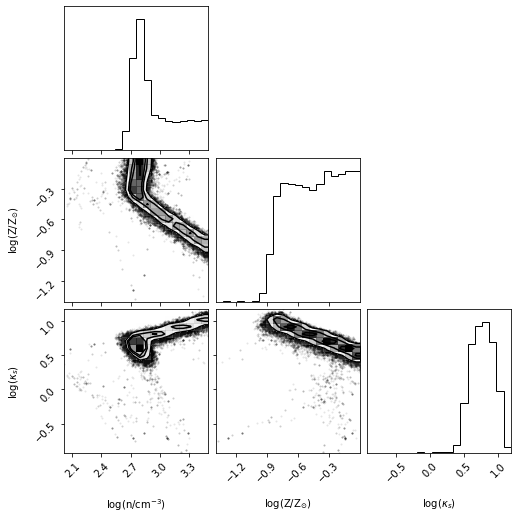

In [7]:
import corner
fig = corner.corner(flat_samples, labels=["log(n/cm$^{-3}$)", "log(Z/Z$_{\odot}$)", "log($\kappa_s$)"])